#**TripMate**


## **1. Import Library**

In [49]:
# For data processing
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

##**2. Upload Dataset**

In [2]:
# URL of raw file dataset in GitHub repository
place = 'https://raw.githubusercontent.com/Firyalanissafiyah/CAPSTONE/main/dataset/tourism_with_id.csv'
rating = 'https://raw.githubusercontent.com/Firyalanissafiyah/CAPSTONE/main/dataset/tourism_rating.csv'
user = 'https://raw.githubusercontent.com/Firyalanissafiyah/CAPSTONE/main/dataset/user.csv'

##**3. Data Preprocessing**

**a. Place**

In [3]:
# Load data 'place' from URL to DataFrame
place = pd.read_csv(place)

In [4]:
# Viewing overview of the 'place' data
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [5]:
# Dropping unused columns
place = place.drop(['Unnamed: 11','Unnamed: 12', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'], axis=1)
place.head(3)

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6


In [6]:
# Delete rows that have a value of 0 in the Price column
place = place[place['Price'] != 0]
place.head(10)

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5
5,6,Taman Impian Jaya Ancol,Taman Impian Jaya Ancol merupakan sebuah objek...,Taman Hiburan,Jakarta,25000,4.5
6,7,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Cagar Alam,Jakarta,4000,4.5
7,8,Ocean Ecopark,Ocean Ecopark Salah satu zona rekreasi Ancol y...,Taman Hiburan,Jakarta,180000,4.0
8,9,Pelabuhan Marina,Pelabuhan Marina Ancol berada di kawasan Taman...,Bahari,Jakarta,175000,4.4
9,10,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Bahari,Jakarta,150000,4.5
10,11,Pulau Bidadari,Pulau Bidadari merupakan salah satu resor di K...,Bahari,Jakarta,5000,4.6


In [7]:
# Information about the DataFrame 'place'
place.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 436
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     300 non-null    int64  
 1   Place_Name   300 non-null    object 
 2   Description  300 non-null    object 
 3   Category     300 non-null    object 
 4   City         300 non-null    object 
 5   Price        300 non-null    int64  
 6   Rating       300 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


**b. Rating**

In [8]:
# Load 'rating' data from URL to DataFrame
rating = pd.read_csv(rating)

In [9]:
# Viewing overview of the rating data
rating.head(3)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5


In [10]:
# Information about the DataFrame 'rating'
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [11]:
# Filtering the rating data to include only ratings for tourist attractions
place_rating = pd.merge(rating, place[['Place_Id', 'Category', 'City', 'Price', 'Place_Name']], on='Place_Id', how='left')
place_rating

,User_Id,Place_Id,Place_Ratings,Category,City,Price,Place_Name
0,1,179,3,Budaya,Yogyakarta,75000.0,Candi Ratu Boko
1,1,344,2,Bahari,Semarang,3000.0,Pantai Marina
2,1,5,5,Taman Hiburan,Jakarta,94000.0,Atlantis Water Adventure
3,1,373,3,Budaya,Semarang,10000.0,Museum Kereta Ambarawa
4,1,101,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9995,300,425,2,Taman Hiburan,Surabaya,35000.0,Waterpark Kenjeran Surabaya
9996,300,64,4,Budaya,Jakarta,2000.0,Museum Sasmita Loka Ahmad Yani
9997,300,311,3,Cagar Alam,Bandung,25000.0,The Lodge Maribaya
9998,300,279,4,NaN,NaN,NaN,NaN


In [12]:
# Information about shape of 'place_rating' DataFrame
place_rating.shape

(10000, 7)

In [13]:
# Information about the DataFrame 'place_rating'
place_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        10000 non-null  int64  
 1   Place_Id       10000 non-null  int64  
 2   Place_Ratings  10000 non-null  int64  
 3   Category       6818 non-null   object 
 4   City           6818 non-null   object 
 5   Price          6818 non-null   float64
 6   Place_Name     6818 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB


**c. User**

In [14]:
# Load data 'user' from URL to DataFrame
user = pd.read_csv(user)

In [15]:
# Viewing overview of the user data
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [16]:
# Viewing the dataset of users who have rated tourist attractions in Bandung City
user.shape

(300, 3)

##**4. Exploratory Data**

               Jumlah rating  Persentase
Place_Ratings                           
4                       2106        21.1
3                       2096        21.0
2                       2071        20.7
5                       2021        20.2
1                       1706        17.1


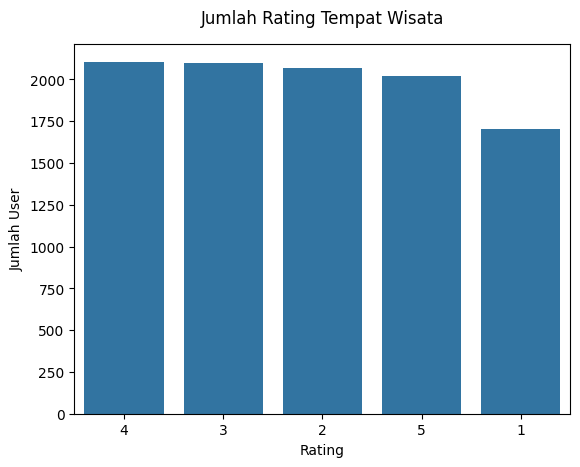

In [17]:
# Create a visualization of the number of tourist attractions rating
count = place_rating['Place_Ratings'].value_counts()
percent = 100 * place_rating['Place_Ratings'].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah rating' : count, 'Persentase' : percent.round(1)})
print(df)
sns.countplot(x = place_rating['Place_Ratings'], data = place_rating, order = place_rating['Place_Ratings'].value_counts().index)
plt.title('Jumlah Rating Tempat Wisata', pad=15)
plt.xlabel('Rating')
plt.ylabel('Jumlah User')
plt.show()

               Jumlah rating  Persentase
Category                                
Taman Hiburan           2072        30.4
Cagar Alam              1998        29.3
Budaya                  1631        23.9
Bahari                  1079        15.8
Tempat Ibadah             38         0.6


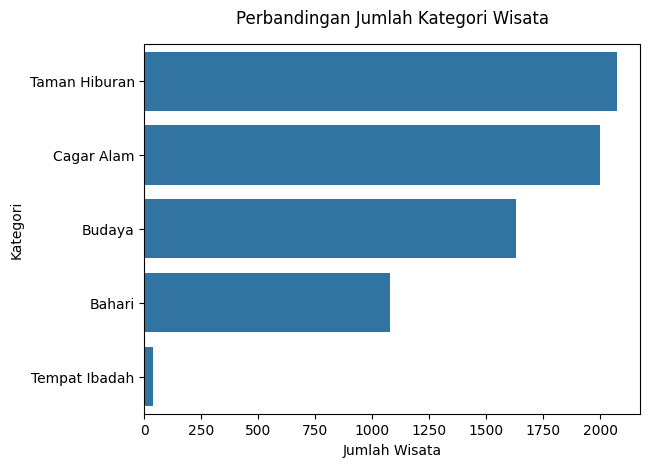

In [18]:
# Create a visualization of the number of tourist categories based on the number of ratings
count = place_rating['Category'].value_counts()
percent = 100 * place_rating['Category'].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah rating' : count, 'Persentase' : percent.round(1)})
print(df)
sns.countplot(y = place_rating['Category'], data = place_rating, order = place_rating['Category'].value_counts().index)
plt.title('Perbandingan Jumlah Kategori Wisata', pad=15)
plt.xlabel('Jumlah Wisata')
plt.ylabel('Kategori')
plt.show()

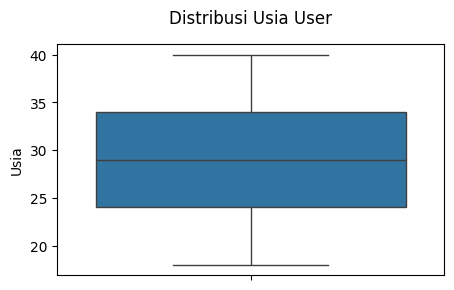

In [19]:
# Create a visualization of user age distribution
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=15)
plt.ylabel('Usia')
plt.show()

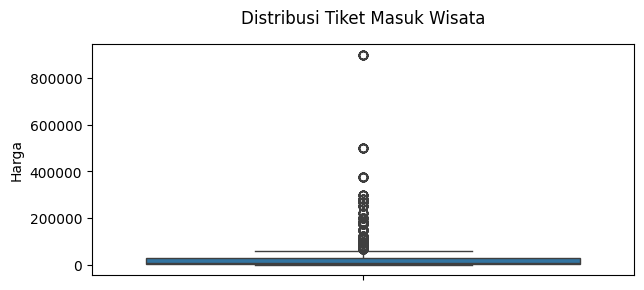

In [20]:
# Create a visualization of tourist attraction price distribution
plt.figure(figsize=(7,3))
sns.boxplot(place_rating['Price'])
plt.title('Distribusi Tiket Masuk Wisata', pad=15)
plt.ylabel('Harga')
plt.show()

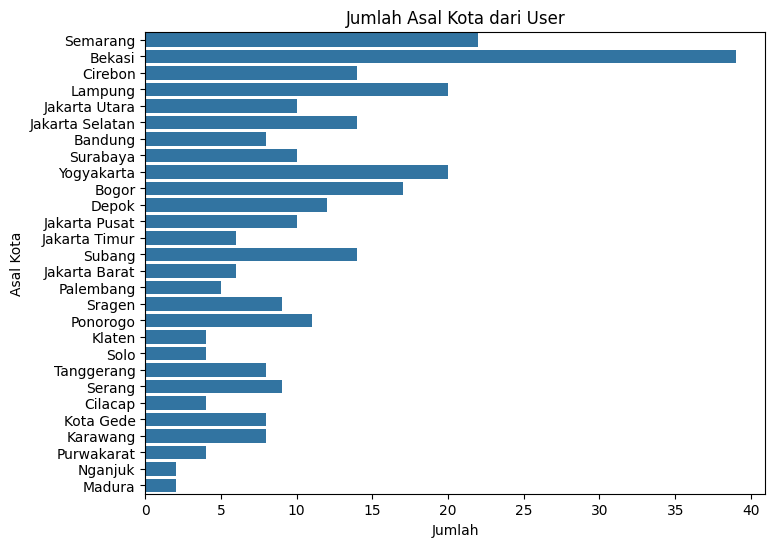

In [21]:
# Filtering the city origin of the user
asal_kota = user['Location'].apply(lambda x : x.split(',')[0])

# Visualization of the city of origin of the user
plt.figure(figsize=(8,6))
sns.countplot(y=asal_kota)
plt.title('Jumlah Asal Kota dari User')
plt.xlabel('Jumlah')
plt.ylabel('Asal Kota')
plt.show()

## **5. Data Preparation**

In [22]:
# Check null value
place_rating.isnull().sum()

User_Id             0
Place_Id            0
Place_Ratings       0
Category         3182
City             3182
Price            3182
Place_Name       3182
dtype: int64

In [23]:
# Delete rows that have NaN values in the 'Place_Name' column
place_rating = place_rating.dropna(subset=['Place_Name'])

In [24]:
# Count the number of Place_Id in place_rating dataset
len(place_rating.Place_Id.unique())

300

In [25]:
# Read dataset for encoding
tourism = place_rating.copy()
tourism.head()

,User_Id,Place_Id,Place_Ratings,Category,City,Price,Place_Name
0,1,179,3,Budaya,Yogyakarta,75000.0,Candi Ratu Boko
1,1,344,2,Bahari,Semarang,3000.0,Pantai Marina
2,1,5,5,Taman Hiburan,Jakarta,94000.0,Atlantis Water Adventure
3,1,373,3,Budaya,Semarang,10000.0,Museum Kereta Ambarawa
5,1,312,2,Cagar Alam,Bandung,11000.0,Taman Hutan Raya Ir. H. Juanda


In [26]:
# Delete duplicates of tourism dataset
tourism = tourism.drop_duplicates('Place_Id')
tourism

,User_Id,Place_Id,Place_Ratings,Category,City,Price,Place_Name
0,1,179,3,Budaya,Yogyakarta,75000.0,Candi Ratu Boko
1,1,344,2,Bahari,Semarang,3000.0,Pantai Marina
2,1,5,5,Taman Hiburan,Jakarta,94000.0,Atlantis Water Adventure
3,1,373,3,Budaya,Semarang,10000.0,Museum Kereta Ambarawa
5,1,312,2,Cagar Alam,Bandung,11000.0,Taman Hutan Raya Ir. H. Juanda
...,...,...,...,...,...,...,...
1760,54,361,1,Taman Hiburan,Semarang,10000.0,Wisata Kampung Krisan Clapar
2008,62,370,1,Budaya,Semarang,5000.0,Benteng Pendem
2399,74,350,4,Bahari,Semarang,5000.0,Pantai Cipta
2448,75,10,2,Bahari,Jakarta,150000.0,Pulau Tidung


In [27]:
# Create a new variable for dictianory
place_id = tourism['Place_Id'].tolist()
place_category = tourism['Category'].tolist()
place_name = tourism['Place_Name'].tolist()
price = tourism['Price'].tolist()
rating = tourism['Place_Ratings'].tolist()
city = tourism['City'].tolist()

print(len(place_id))
print(len(place_category))
print(len(place_name))
print(len(price))
print(len(rating))
print(len(city))

300
300
300
300
300
300


In [28]:
# Create a place_recommend dictianory
place_recommend = pd.DataFrame({
    'id' : place_id,
    'place_category' : place_category,
    'place_name' : place_name,
    'price' : price,
    'rating' : rating,
    'city' : city
})

place_recommend

,id,place_category,place_name,price,rating,city
0,179,Budaya,Candi Ratu Boko,75000.0,3,Yogyakarta
1,344,Bahari,Pantai Marina,3000.0,2,Semarang
2,5,Taman Hiburan,Atlantis Water Adventure,94000.0,5,Jakarta
3,373,Budaya,Museum Kereta Ambarawa,10000.0,3,Semarang
4,312,Cagar Alam,Taman Hutan Raya Ir. H. Juanda,11000.0,2,Bandung
...,...,...,...,...,...,...
295,361,Taman Hiburan,Wisata Kampung Krisan Clapar,10000.0,1,Semarang
296,370,Budaya,Benteng Pendem,5000.0,1,Semarang
297,350,Bahari,Pantai Cipta,5000.0,4,Semarang
298,10,Bahari,Pulau Tidung,150000.0,2,Jakarta


## **6. Modelling**


#### **a. Content Based Filtering**

In [29]:
# Make a copy of the DataFrame
all_data = place_recommend
all_data.head()

,id,place_category,place_name,price,rating,city
0,179,Budaya,Candi Ratu Boko,75000.0,3,Yogyakarta
1,344,Bahari,Pantai Marina,3000.0,2,Semarang
2,5,Taman Hiburan,Atlantis Water Adventure,94000.0,5,Jakarta
3,373,Budaya,Museum Kereta Ambarawa,10000.0,3,Semarang
4,312,Cagar Alam,Taman Hutan Raya Ir. H. Juanda,11000.0,2,Bandung


In [30]:
# Convert text to numerical representation
tf = TfidfVectorizer()
tf.fit(all_data['place_name'])
tf.get_feature_names_out()

array(['3d', '45', '825', 'abdullah', 'ade', 'adhyatma', 'adventure',
       'africa', 'agro', 'agung', 'ahmad', 'air', 'aji', 'al', 'alam',
       'alive', 'amazing', 'ambarawa', 'ancol', 'and', 'anggrek', 'angke',
       'angklung', 'anteng', 'api', 'aquarium', 'argo', 'art', 'artha',
       'aseupan', 'asia', 'asri', 'atlantis', 'baduga', 'bahari', 'bambu',
       'banaran', 'bandros', 'bandung', 'bangsal', 'bangunrejo', 'bank',
       'bantal', 'barli', 'baron', 'baruna', 'basoeki', 'batik', 'batu',
       'batununggal', 'bay', 'becici', 'begonia', 'belanda', 'bening',
       'benteng', 'berdosa', 'bidadari', 'binatang', 'bintang', 'blaster',
       'blue', 'boko', 'borobudur', 'bosscha', 'breksi', 'buah',
       'bugbrug', 'bukit', 'bumi', 'bunga', 'bunker', 'cafe', 'camp',
       'candi', 'castle', 'cattleya', 'celosia', 'cemara', 'cerme',
       'chapel', 'chinatown', 'chingu', 'ciater', 'cibubur', 'cibugary',
       'cibuni', 'cihanjuang', 'cikole', 'cilengkrang', 'cileunca',
 

In [31]:
# Convert data into integer matrix form
tfdif_matrix = tf.fit_transform(all_data['place_name'])
tfdif_matrix.shape

(300, 530)

In [32]:
# Convert tf-dif vector into matrix form
tfdif_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
# Sampling and inspecting a subset of the TF-IDF matrix for place names and categories.
pd.DataFrame(
    tfdif_matrix.todense(),
    columns = tf.get_feature_names_out(),
    index = all_data.place_category
).sample(22, axis = 1).sample(10, axis = 0)

,jungwok,sudut,sidomukti,ciputra,baron,karaton,bukit,natha,floating,siwarak,...,bank,galaxy,nuart,puspa,sanapati,grojogan,3d,patenggang,kopi,gunung
place_category,,,,,,,,,,,,,,,,,,,,,
Budaya,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
Budaya,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
Taman Hiburan,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
Budaya,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
Cagar Alam,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.632839
Budaya,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
Cagar Alam,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73133,0.0,0.000000
Cagar Alam,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000
Budaya,0.0,0.0,0.0,0.0,0.0,0.0,0.468474,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000


**COSINE SIMILARITY**

In [34]:
# Cosine similarity matrix calculation
cosine_sim = cosine_similarity(tfdif_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.20982739, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.20982739, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [35]:
# Cosine similarity DataFrame creation
cosine_sim_df = pd.DataFrame(cosine_sim, index = all_data['place_name'], columns = all_data['place_name'])
print('Shape : ', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis = 1).sample(10, axis = 0)

Shape :  (300, 300)


place_name,Rainbow Garden,Museum Layang-layang,Pantai Indrayanti,Tirto Argo Siwarak,Pantai Watu Kodok
place_name,,,,,
Situ Patenggang,0.0,0.000000,0.00000,0.0,0.000000
Monumen Kapal Selam,0.0,0.000000,0.00000,0.0,0.000000
Lava Bantal,0.0,0.000000,0.00000,0.0,0.000000
Sam Poo Kong Temple,0.0,0.000000,0.00000,0.0,0.000000
Museum Geologi Bandung,0.0,0.096451,0.00000,0.0,0.000000
Farm House Susu Lembang,0.0,0.000000,0.00000,0.0,0.000000
Pantai Krakal,0.0,0.000000,0.19857,0.0,0.163526
Pantai Sundak,0.0,0.000000,0.19857,0.0,0.163526
Bukit Moko,0.0,0.000000,0.00000,0.0,0.000000


In [36]:
# Function for recommendation
def place_recommendations(nama_tempat, similarity_data = cosine_sim_df, items = all_data[['place_name', 'place_category']], k = 5) :
  index = similarity_data.loc[:, nama_tempat].to_numpy().argpartition(
      range(-1, -k, -1)
  )

  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(nama_tempat, errors = 'ignore')

  return pd.DataFrame(closest).merge(items).head(k)

In [37]:
# Example of filtering data for specific place
all_data[all_data.place_name.eq('Candi Gedong Songo')]

,id,place_category,place_name,price,rating,city
79,335,Budaya,Candi Gedong Songo,10000.0,3,Semarang


In [38]:
place_recommendations('Candi Gedong Songo')

,place_name,place_category
0,Candi Sewu,Budaya
1,Candi Borobudur,Budaya
2,Candi Ijo,Budaya
3,Candi Prambanan,Budaya
4,Candi Ratu Boko,Budaya


#### **2. Collaborative Filtering**

In [39]:
# Sorting tourism data by User ID
trip = tourism
trip = trip.sort_values(by='User_Id', ascending=True)
trip

,User_Id,Place_Id,Place_Ratings,Category,City,Price,Place_Name
0,1,179,3,Budaya,Yogyakarta,75000.0,Candi Ratu Boko
28,1,48,2,Budaya,Jakarta,5000.0,Taman Ismail Marzuki
26,1,307,4,Cagar Alam,Bandung,5000.0,Perkebunan Teh Malabar
25,1,328,2,Cagar Alam,Bandung,10000.0,Gua Pawon
24,1,21,2,Budaya,Jakarta,5000.0,Museum Wayang
...,...,...,...,...,...,...,...
1760,54,361,1,Taman Hiburan,Semarang,10000.0,Wisata Kampung Krisan Clapar
2008,62,370,1,Budaya,Semarang,5000.0,Benteng Pendem
2399,74,350,4,Bahari,Semarang,5000.0,Pantai Cipta
2448,75,10,2,Bahari,Jakarta,150000.0,Pulau Tidung


In [40]:
# Encoding user IDs in Tourism data
user_ids = trip['User_Id'].unique().tolist()
print('list User_Id : ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id : ', user_encoded_to_user)

list User_Id :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 51, 52, 54, 62, 74, 75, 78]
encoded User_Id :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 35: 33, 36: 34, 37: 35, 38: 36, 39: 37, 40: 38, 41: 39, 42: 40, 43: 41, 44: 42, 45: 43, 48: 44, 51: 45, 52: 46, 54: 47, 62: 48, 74: 49, 75: 50, 78: 51}
encoded angka ke User_Id :  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 35, 34: 36, 35: 37, 36: 38, 37: 39, 38: 40, 39: 41, 40: 42, 41: 43, 42: 44, 43: 45, 44: 4

In [41]:
# Encoding place IDs in Tourism data
place_ids = trip['Place_Id'].unique().tolist()
print('list Place_Id : ', place_ids)

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
print('encoded Place_Id : ', place_to_place_encoded)

place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}
print('encoded angka ke Place_Id : ', place_encoded_to_place)

list Place_Id :  [179, 48, 307, 328, 21, 246, 76, 336, 41, 405, 67, 208, 89, 5, 373, 312, 344, 20, 154, 258, 281, 262, 321, 18, 166, 367, 390, 176, 371, 413, 185, 107, 111, 78, 85, 437, 193, 198, 237, 228, 134, 24, 104, 382, 17, 249, 86, 118, 250, 202, 421, 319, 131, 97, 309, 290, 229, 14, 43, 377, 88, 348, 82, 242, 268, 376, 50, 4, 190, 115, 335, 433, 368, 27, 301, 143, 391, 159, 9, 300, 138, 224, 410, 119, 121, 359, 116, 379, 102, 64, 178, 219, 334, 243, 31, 247, 13, 148, 296, 129, 183, 126, 213, 269, 255, 192, 130, 238, 56, 267, 164, 173, 235, 45, 98, 306, 158, 275, 341, 233, 188, 331, 253, 225, 211, 206, 304, 417, 196, 28, 197, 230, 234, 205, 63, 75, 12, 42, 168, 36, 145, 339, 90, 150, 6, 127, 11, 186, 149, 109, 37, 430, 226, 355, 71, 52, 141, 139, 203, 46, 72, 94, 369, 194, 65, 163, 245, 177, 214, 191, 114, 156, 171, 325, 396, 8, 362, 59, 170, 360, 239, 357, 248, 153, 297, 187, 365, 342, 277, 207, 73, 201, 252, 132, 270, 289, 308, 3, 330, 210, 181, 256, 318, 19, 199, 332, 182, 184

In [42]:
# Mapping User_Id dan Place_Id ke indeks numerik
trip['user'] = trip['User_Id'].map(user_to_user_encoded)
trip['place'] = trip['Place_Id'].map(place_to_place_encoded)

In [43]:
# Calculating the number of users, rlaces, and rating range
num_users = len(user_to_user_encoded)
print(num_users)

num_places = len(place_encoded_to_place)
print(num_places)

trip['Place_Ratings'] = trip['Place_Ratings'].values.astype(np.float32)

min_rating = min(trip['Place_Ratings'])

max_rating = max(trip['Place_Ratings'])

print('Number of User : {}, Number of Place : {}, Min Rating {}, Max Rating {}'.format(
    num_users, num_places, min_rating, max_rating
))

52
300
Number of User : 52, Number of Place : 300, Min Rating 1.0, Max Rating 5.0


## **7. Training and Validation Data**

In [44]:
# Shuffling the trip DataFrame
trip = trip.sample(frac = 1, random_state = 30)
trip

,User_Id,Place_Id,Place_Ratings,Category,City,Price,Place_Name,user,place
2,1,5,5.0,Taman Hiburan,Jakarta,94000.0,Atlantis Water Adventure,0,13
263,9,341,5.0,Cagar Alam,Semarang,3000.0,Hutan Wisata Tinjomoyo Semarang,8,118
42,2,437,5.0,Tempat Ibadah,Surabaya,10000.0,Gereja Perawan Maria Tak Berdosa Surabaya,1,35
97,4,4,4.0,Taman Hiburan,Jakarta,10000.0,Taman Mini Indonesia Indah (TMII),3,67
447,15,357,3.0,Cagar Alam,Semarang,10000.0,Wisata Alam Wana Wisata Penggaron,14,181
...,...,...,...,...,...,...,...,...,...
284,10,230,4.0,Taman Hiburan,Bandung,30000.0,Stone Garden Citatah,9,131
316,11,127,3.0,Taman Hiburan,Yogyakarta,10000.0,Blue Lagoon Jogja,10,145
878,28,364,3.0,Taman Hiburan,Semarang,80000.0,Water Blaster Bukit Candi Golf,27,251
264,10,145,3.0,Taman Hiburan,Yogyakarta,5000.0,Desa Wisata Rumah Domes/Teletubbies,9,140


In [45]:
# Viewing information about trip
trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 2 to 1671
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        300 non-null    int64  
 1   Place_Id       300 non-null    int64  
 2   Place_Ratings  300 non-null    float32
 3   Category       300 non-null    object 
 4   City           300 non-null    object 
 5   Price          300 non-null    float64
 6   Place_Name     300 non-null    object 
 7   user           300 non-null    int64  
 8   place          300 non-null    int64  
dtypes: float32(1), float64(1), int64(4), object(3)
memory usage: 22.3+ KB


In [46]:
# Preparing training and validation data
x = trip[['User_Id', 'Place_Id']].values

y = trip['Place_Ratings'].apply(lambda x: (x - min(trip['Place_Ratings'])) / (max(trip['Place_Ratings']) - min(trip['Place_Ratings']))).values

train_indices = int(0.8 * trip.shape[0])
x_train, x_val, y_train, y_val = (x[:train_indices], x[train_indices:], y[:train_indices], y[train_indices:])

print(x, y)


[[  1   5]
 [  9 341]
 [  2 437]
 [  4   4]
 [ 15 357]
 [  7 126]
 [ 22 315]
 [  6 243]
 [ 13 245]
 [ 16  73]
 [  5 391]
 [ 31 324]
 [  3 319]
 [ 20 404]
 [ 17 256]
 [ 12 369]
 [ 11 149]
 [  4 242]
 [  1  48]
 [ 17 308]
 [ 31 273]
 [ 10 197]
 [ 25 172]
 [ 37 287]
 [  2 176]
 [ 74 350]
 [  4  14]
 [  4  97]
 [ 26 162]
 [  6 121]
 [  9 225]
 [  8  98]
 [  1  20]
 [  2 281]
 [ 17 289]
 [ 41 175]
 [ 17 318]
 [  4  88]
 [  9 196]
 [ 45 232]
 [ 36   1]
 [ 27 316]
 [  4 348]
 [  8 130]
 [ 25 386]
 [  5   9]
 [ 10 205]
 [  7 148]
 [ 11 109]
 [ 16 201]
 [  6 379]
 [ 16 270]
 [ 17 210]
 [  2 390]
 [ 17 330]
 [  3 134]
 [ 12  65]
 [  6 334]
 [ 15 170]
 [  1  89]
 [  4 268]
 [  6 359]
 [  1  41]
 [  8 235]
 [ 12  71]
 [ 30 431]
 [ 23 240]
 [ 15 248]
 [  5 159]
 [ 78   7]
 [  8 164]
 [  7 183]
 [ 15 239]
 [ 12  52]
 [ 24  66]
 [  6 178]
 [ 43 387]
 [ 17 181]
 [  9 253]
 [ 19 195]
 [  8 173]
 [ 23  60]
 [  3 250]
 [  2 166]
 [ 14 396]
 [  3  24]
 [  2  18]
 [  1  76]
 [ 10  12]
 [ 28 215]
 [  3 198]

In [47]:
# Calculate the maximum indices for users and places
max_user_index = trip['User_Id'].max()
max_place_index = trip['Place_Id'].max()

# Use the max indices to set the dimensions for embedding layers
num_users = max_user_index + 1
num_places = max_place_index + 1
embedding_size = 50


In [50]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_places, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_places = num_places
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.places_embedding = layers.Embedding(
            num_places,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.places_bias = layers.Embedding(num_places, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        places_vector = self.places_embedding(inputs[:, 1])
        places_bias = self.places_bias(inputs[:, 1])

        dot_user_places = tf.tensordot(user_vector, places_vector, 2)

        x = dot_user_places + user_bias + places_bias

        return tf.nn.sigmoid(x)


num_users = 1000
num_places = 1000
embedding_size = 50


In [58]:
model = RecommenderNet(num_users, num_places, 50)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [59]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size=16,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
15/15 [==============================] - 2s 30ms/step - loss: 0.6922 - root_mean_squared_error: 0.3006 - val_loss: 0.6954 - val_root_mean_squared_error: 0.2993
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6792 - root_mean_squared_error: 0.2896 - val_loss: 0.6954 - val_root_mean_squared_error: 0.2993
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6717 - root_mean_squared_error: 0.2831 - val_loss: 0.6955 - val_root_mean_squared_error: 0.2994
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6703 - root_mean_squared_error: 0.2820 - val_loss: 0.6956 - val_root_mean_squared_error: 0.2995
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6679 - root_mean_squared_error: 0.2799 - val_loss: 0.6954 - val_root_mean_squared_error: 0.2993
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6650 - root_mean_squared_error: 0.2774 - val_loss: 0.6951 - val_root_

## **8. Visualization**

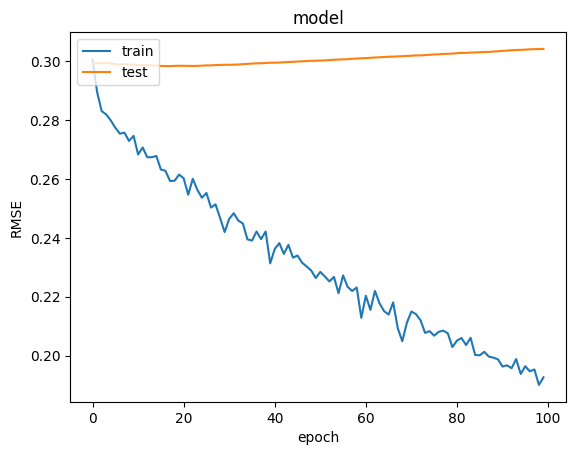

In [60]:
# Plotting model training and validation RMSE over epochs
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

## **9. System Recommendation**

In [61]:
# Ensure required variables and model are defined
assert 'place_recommend' in globals(), "Variable 'place_recommend' is not defined"
assert 'place_to_place_encoded' in globals(), "Variable 'place_to_place_encoded' is not defined"
assert 'user_to_user_encoded' in globals(), "Variable 'user_to_user_encoded' is not defined"
assert 'model' in globals(), "Model is not defined"

place_trip = place_recommend
trip = pd.read_csv('https://raw.githubusercontent.com/Firyalanissafiyah/CAPSTONE/main/dataset/tourism_rating.csv')

trip['Place_Ratings'] = trip['Place_Ratings'].values.astype(np.float32)

# Sampling a user_id and verifying it
user_id = trip.User_Id.sample(1).iloc[0]
print(f'Selected user_id: {user_id}')

user_encoder = user_to_user_encoded.get(user_id)
while user_encoder is None:
    user_id = trip.User_Id.sample(1).iloc[0]
    user_encoder = user_to_user_encoded.get(user_id)
print(f'New selected user_id: {user_id}')

place_visited_by_user = trip[trip.User_Id == user_id]
print(f'Places visited by user: {place_visited_by_user}')

place_not_visited = place_trip[~place_trip['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
print(f'Place not visited: {place_not_visited}')

# Encoding place_not_visited and checking for None
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
print(f'Encoded places not visited: {place_not_visited}')

# Checking if any place encoding resulted in None
for place in place_not_visited:
    if place[0] is None:
        raise ValueError("One of the place IDs could not be encoded properly")

# Creating user_place_array and checking its contents
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)
print(f'user_place_array: {user_place_array}')

rate = model.predict(user_place_array).flatten()

top_rate_indices = rate.argsort()[-8:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_rate_indices
]

print('Rekomendasi untuk user : {}'.format(user_id))
print('====' * 10)
print('Tempat dengan rating wisata user paling tinggi')
print('----' * 10)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_trip[place_trip['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
  print(row.place_name, ':', row.place_category)

print('----' * 10)
print('Top 8 Rekomendasi Wisata')
print('----' * 10)

recommended_place = place_trip[place_trip['id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
  print(row.place_name, ':', row.place_category)
print('===' * 15)

# Saving the model
model.save("model_tripmate", save_format="tf")


Selected user_id: 56
New selected user_id: 21
Places visited by user:      User_Id  Place_Id  Place_Ratings
635       21       413            5.0
636       21       411            4.0
637       21       147            3.0
638       21       121            2.0
639       21       373            5.0
640       21       233            4.0
641       21        64            3.0
642       21       101            4.0
643       21       102            2.0
644       21       241            4.0
645       21       362            2.0
646       21       427            4.0
647       21       209            3.0
648       21       177            4.0
649       21        88            5.0
650       21        74            3.0
651       21       113            3.0
652       21        44            2.0
653       21       323            2.0
654       21       296            2.0
655       21       412            5.0
656       21        45            2.0
Place not visited: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 

In [62]:
rate = model.predict(user_place_array).flatten()

top_rate_indices = rate.argsort()[-8:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_rate_indices
]

print('Rekomendasi untuk user : {}'.format(user_id))
print('====' * 10)
print('Tempat dengan rating wisata user paling tinggi')
print('----' * 10)

top_place_user = (
    place_visited_by_user.sort_values(
        by='Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_trip[place_trip['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.place_category)

print('----' * 10)
print('Top 8 Rekomendasi Wisata')
print('----' * 10)

recommended_place = place_trip[place_trip['id'].isin(recommended_place_ids)]

# Checking the presence of 'place_price' and 'place_rating' columns
has_place_price = 'place_price' in place_trip.columns
has_place_rating = 'place_rating' in place_trip.columns

for row in recommended_place.itertuples():
    if has_place_price and has_place_rating:
        print(row.place_name, ':', row.place_category, ':', row.place_price, ':', row.place_rating)
    elif has_place_price:
        print(row.place_name, ':', row.place_category, ':', row.place_price)
    elif has_place_rating:
        print(row.place_name, ':', row.place_category, ':', row.place_rating)
    else:
        print(row.place_name, ':', row.place_category)
print('===' * 15)


9/9 [==============================] - 0s 2ms/step
Rekomendasi untuk user : 21
Tempat dengan rating wisata user paling tinggi
----------------------------------------
Museum Kereta Ambarawa : Budaya
Museum TNI AL Loka Jala Crana : Budaya
Museum Benteng Vredeburg Yogyakarta : Budaya
----------------------------------------
Top 8 Rekomendasi Wisata
----------------------------------------
Pantai Greweng : Bahari
Pantai Pok Tunggal : Bahari
Situ Cileunca : Cagar Alam
Taman Impian Jaya Ancol : Taman Hiburan
Wisata Kraton Jogja : Budaya
Trans Studio Bandung : Taman Hiburan
Taman Kupu-Kupu Cihanjuang : Cagar Alam
The World Landmarks - Merapi Park Yogyakarta : Taman Hiburan


In [63]:
model.save_weights("model_tripmate_weights.h5")